In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
data = pd.read_csv("/content/boston-zillow.csv")

In [3]:
data

,property_id,address,street_name,city,rstate,postcode,price,zestimate,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,property_type,property_status,agency_name
0,59169678,"8 Gloucester St APT 12, Boston, MA 02115",Gloucester St APT 12,Boston,MA,2115,1175000,1202100,2.0,2.0,1019.0,1153.0,1306.8,CONDO,FOR_SALE,Engel & Volkers Boston
1,59178524,"501 Beacon St APT 1, Boston, MA 02215",Beacon St APT 1,Boston,MA,2215,539000,475500,1.0,1.0,962.0,560.0,NaN,CONDO,FOR_SALE,Keller Williams Realty Cambridge
2,333606541,"131-133 Williams St UNIT 2, Boston, MA 02130",133 Williams St UNIT 2,Boston,MA,2130,599000,647600,2.0,2.0,622.0,963.0,NaN,CONDO,FOR_SALE,Keller Williams Realty Boston-Metro | Back Bay
3,59101641,"31 Homestead St #1, Boston, MA 02121",Homestead St #1,Boston,MA,2121,455000,461100,3.0,2.0,369.0,1232.0,1306.8,CONDO,FOR_SALE,Unlimited Sotheby's International Realty
4,2096344991,"25 Bay State Rd STE 2, Boston, MA 02215",Bay State Rd STE 2,Boston,MA,2215,1150000,NaN,3.0,3.0,1023.0,1124.0,1306.8,CONDO,FOR_SALE,Coldwell Banker Realty - South End
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2065796190,"18 Crestway Rd UNIT 5, Boston, MA 02128",Crestway Rd UNIT 5,Boston,MA,2128,769900,NaN,2.0,2.0,597.0,1289.0,NaN,CONDO,FOR_SALE,NaN
776,2065796192,"18 Crestway Rd UNIT 3, Boston, MA 02128",Crestway Rd UNIT 3,Boston,MA,2128,679900,NaN,2.0,2.0,671.0,1012.0,NaN,CONDO,FOR_SALE,NaN
777,2065796191,"18 Crestway Rd UNIT 4, Boston, MA 02128",Crestway Rd UNIT 4,Boston,MA,2128,929900,NaN,5.0,3.0,481.0,1930.0,NaN,CONDO,FOR_SALE,NaN
778,2065796201,"18 Crestway Rd UNIT 2, Boston, MA 02128",Crestway Rd UNIT 2,Boston,MA,2128,899900,NaN,3.0,2.0,485.0,1854.0,NaN,CONDO,FOR_SALE,NaN


In [4]:
#Data Cleaning
data = data.dropna()
data

,property_id,address,street_name,city,rstate,postcode,price,zestimate,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,property_type,property_status,agency_name
0,59169678,"8 Gloucester St APT 12, Boston, MA 02115",Gloucester St APT 12,Boston,MA,2115,1175000,1202100,2.0,2.0,1019.0,1153.0,1306.8,CONDO,FOR_SALE,Engel & Volkers Boston
3,59101641,"31 Homestead St #1, Boston, MA 02121",Homestead St #1,Boston,MA,2121,455000,461100,3.0,2.0,369.0,1232.0,1306.8,CONDO,FOR_SALE,Unlimited Sotheby's International Realty
7,59171381,"386 Riverway APT 2, Boston, MA 02115",Riverway APT 2,Boston,MA,2115,495000,590100,1.0,1.0,529.0,934.0,934.0,CONDO,FOR_SALE,"Longwood Residential, LLC"
8,189924486,"87-89 Nottinghill Rd, Boston, MA 02135",89 Nottinghill Rd,Boston,MA,2135,999000,999000,4.0,4.0,403.0,2478.0,2613.6,MULTI_FAMILY,FOR_SALE,Donnelly + Co.
12,118162434,"301 Chestnut Ave #1, Boston, MA 02130",Chestnut Ave #1,Boston,MA,2130,799000,814700,2.0,2.0,700.0,1141.0,1306.8,CONDO,FOR_SALE,McCormack & Scanlan Real Estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,189975964,"352R Blue Hill Ave #10, Boston, MA 02121",Blue Hill Ave #10,Boston,MA,2121,449900,456500,3.0,2.0,407.0,1104.0,1306.8,CONDO,FOR_SALE,Dejahn Renrick
703,333606848,"304-306 Cummins Hwy #1, Boston, MA 02131",306 Cummins Hwy #1,Boston,MA,2131,450000,461800,2.0,1.0,443.0,1015.0,1015.0,CONDO,FOR_SALE,Unlimited Sotheby's International Realty
708,2146690846,"39 Old Morton St #2, Boston, MA 02126",Old Morton St #2,Boston,MA,2126,719800,719800,2.0,4.0,492.0,1463.0,7840.8,CONDO,FOR_SALE,Pena Realty Corporation
711,118324465,"4 Woodworth St #1, Boston, MA 02122",Woodworth St #1,Boston,MA,2122,669000,669000,2.0,3.0,375.0,1784.0,1784.0,CONDO,FOR_SALE,"The Galvin Group, LLC"


In [9]:
# Data Cleaning 2
data.drop(data.loc[data['zestimate'] == ' '].index, inplace =True)
# Data Cleaning 3
data.drop(data.loc[data['zestimate'] == 'N.A.'].index, inplace =True)
data

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,property_id,address,street_name,city,rstate,postcode,price,zestimate,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,property_type,property_status,agency_name
0,59169678,"8 Gloucester St APT 12, Boston, MA 02115",Gloucester St APT 12,Boston,MA,2115,1175000,1202100,2.0,2.0,1019.0,1153.0,1306.8,CONDO,FOR_SALE,Engel & Volkers Boston
3,59101641,"31 Homestead St #1, Boston, MA 02121",Homestead St #1,Boston,MA,2121,455000,461100,3.0,2.0,369.0,1232.0,1306.8,CONDO,FOR_SALE,Unlimited Sotheby's International Realty
7,59171381,"386 Riverway APT 2, Boston, MA 02115",Riverway APT 2,Boston,MA,2115,495000,590100,1.0,1.0,529.0,934.0,934.0,CONDO,FOR_SALE,"Longwood Residential, LLC"
8,189924486,"87-89 Nottinghill Rd, Boston, MA 02135",89 Nottinghill Rd,Boston,MA,2135,999000,999000,4.0,4.0,403.0,2478.0,2613.6,MULTI_FAMILY,FOR_SALE,Donnelly + Co.
12,118162434,"301 Chestnut Ave #1, Boston, MA 02130",Chestnut Ave #1,Boston,MA,2130,799000,814700,2.0,2.0,700.0,1141.0,1306.8,CONDO,FOR_SALE,McCormack & Scanlan Real Estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,189975964,"352R Blue Hill Ave #10, Boston, MA 02121",Blue Hill Ave #10,Boston,MA,2121,449900,456500,3.0,2.0,407.0,1104.0,1306.8,CONDO,FOR_SALE,Dejahn Renrick
703,333606848,"304-306 Cummins Hwy #1, Boston, MA 02131",306 Cummins Hwy #1,Boston,MA,2131,450000,461800,2.0,1.0,443.0,1015.0,1015.0,CONDO,FOR_SALE,Unlimited Sotheby's International Realty
708,2146690846,"39 Old Morton St #2, Boston, MA 02126",Old Morton St #2,Boston,MA,2126,719800,719800,2.0,4.0,492.0,1463.0,7840.8,CONDO,FOR_SALE,Pena Realty Corporation
711,118324465,"4 Woodworth St #1, Boston, MA 02122",Woodworth St #1,Boston,MA,2122,669000,669000,2.0,3.0,375.0,1784.0,1784.0,CONDO,FOR_SALE,"The Galvin Group, LLC"


In [10]:
corelation = data.corr()
print(corelation.columns)

Index(['property_id', 'postcode', 'price', 'bedroom_number', 'bathroom_number',
       'price_per_unit', 'living_space', 'land_space'],
      dtype='object')


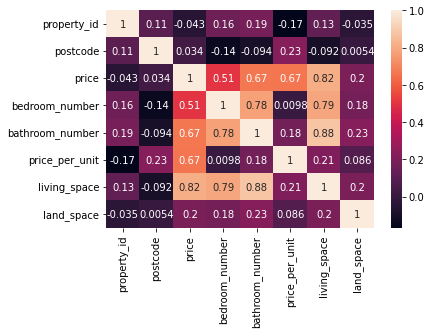

In [11]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

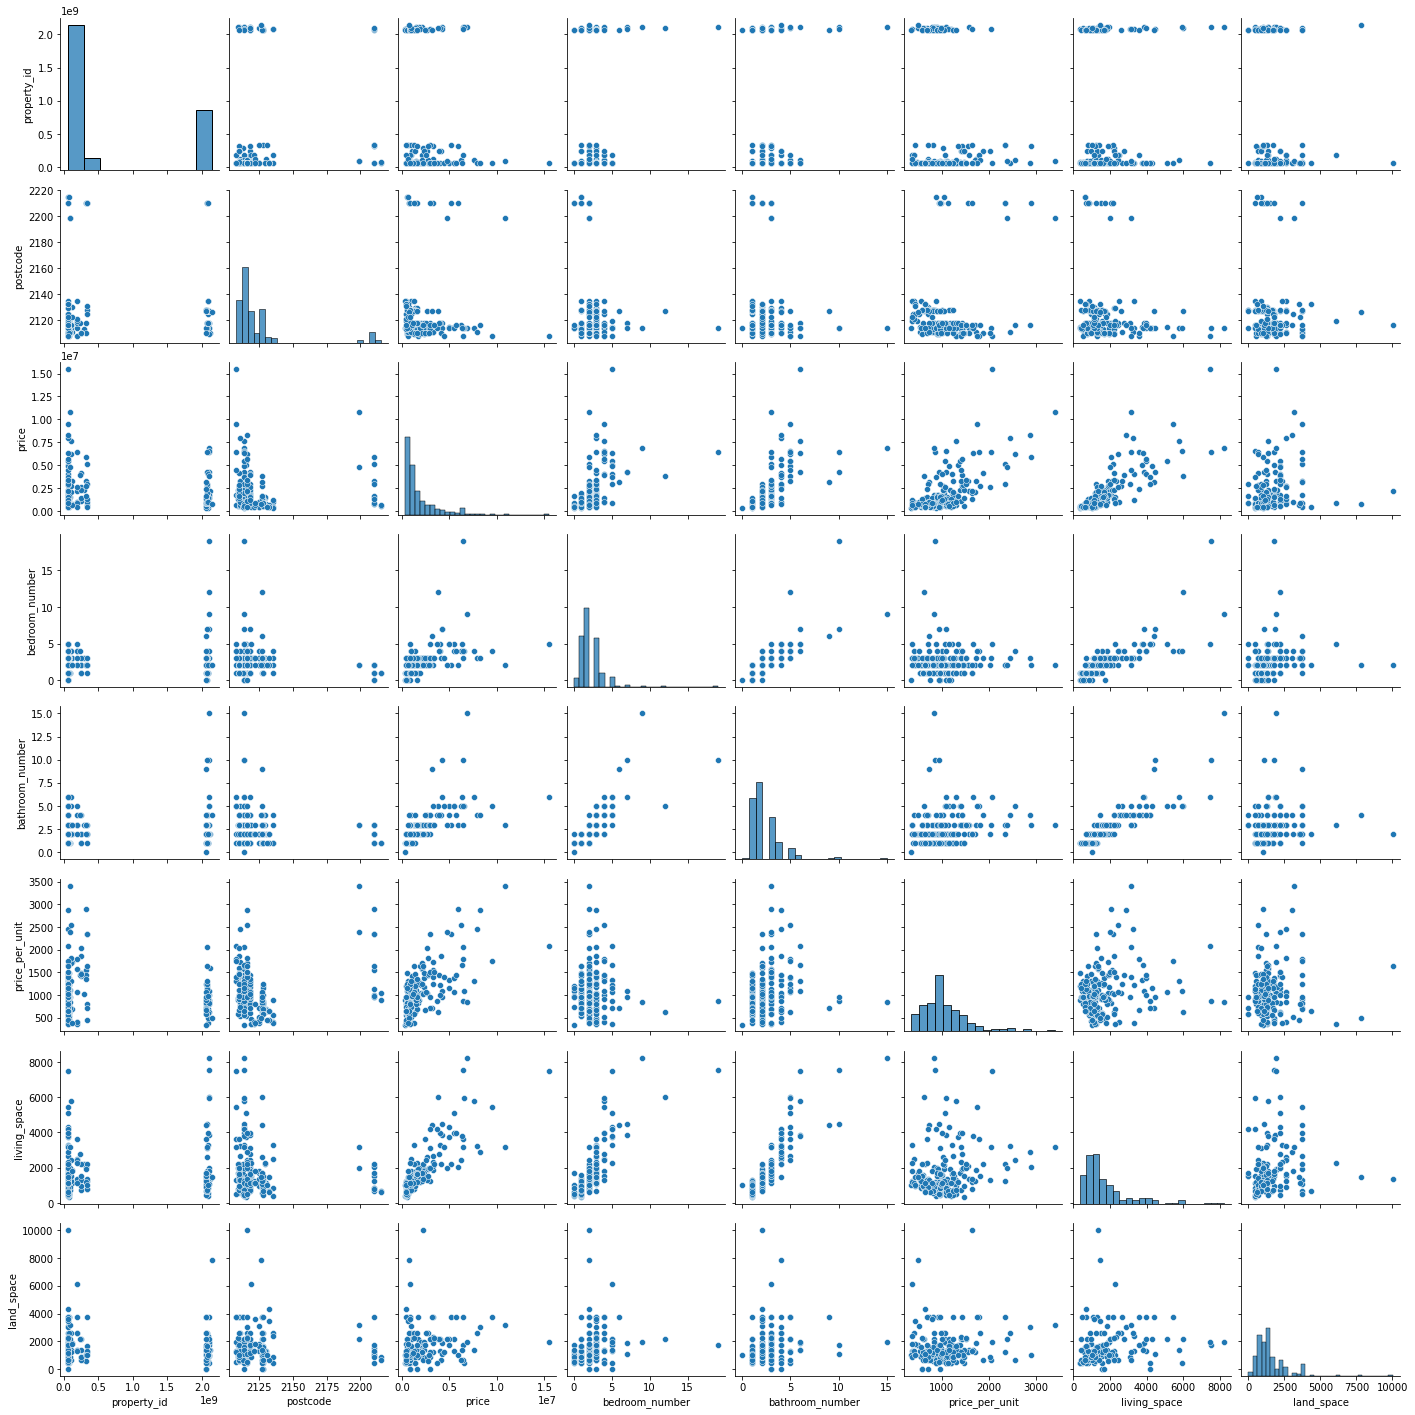

In [12]:
sns.pairplot(data)

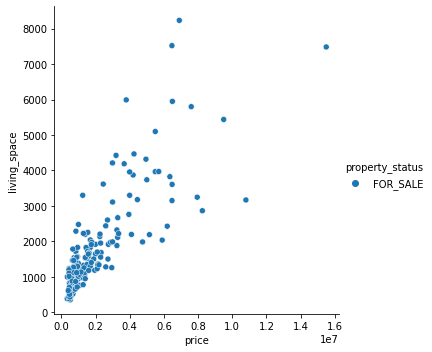

In [13]:
sns.relplot(x= 'price', y='living_space', hue='property_status', data=data)

In [14]:
data.describe()

,property_id,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space
count,2.010000e+02,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000
mean,6.516190e+08,2123.985075,1.958021e+06,2.412935,2.472637,1060.099502,1717.756219,1540.538607
std,8.936469e+08,24.301127,2.110385e+06,1.906209,1.757981,486.414381,1342.670922,1197.219520
min,5.909188e+07,2108.000000,3.399990e+05,0.000000,0.000000,350.000000,352.000000,0.030000
25%,5.917523e+07,2114.000000,7.100000e+05,1.000000,1.000000,746.000000,913.000000,871.200000
50%,8.185724e+07,2116.000000,1.075000e+06,2.000000,2.000000,963.000000,1265.000000,1302.000000
75%,2.067781e+09,2127.000000,2.295000e+06,3.000000,3.000000,1247.000000,1975.000000,1784.000000
max,2.146691e+09,2215.000000,1.550000e+07,19.000000,15.000000,3409.000000,8232.000000,10018.800000
